In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836','#edbd17']))
sns.set_style("darkgrid")

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [48]:
data=pd.read_csv("C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project2\\data\\term-deposit-marketing-2020.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


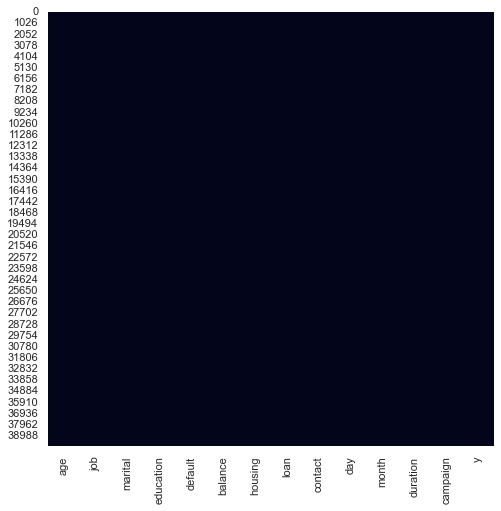

In [49]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),cbar=False);

In [50]:
data['job']=data['job'].astype('category')
data['marital']=data['marital'].astype('category')
data['education']=data['education'].astype('category')
data['default']=data['default'].astype('category')
data['housing']=data['housing'].astype('category')
data['loan']=data['loan'].astype('category')
data['contact']=data['contact'].astype('category')
data['month']=data['month'].astype('category')
data['y']=data['y'].astype('category')

In [51]:
 cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [52]:
features =['age', 'job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign']
x=data.loc[:,features].values
y=data.loc[:,['y']].values
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [53]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [54]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents, columns=['principal component 1','principal component 2'])

In [55]:
finalDf=pd.concat([principalDf, data[['y']]],axis=1)
print(finalDf)

       principal component 1  principal component 2  y
0                  -1.382247               0.976907  0
1                  -1.438367              -0.871597  0
2                  -2.262109               0.024966  0
3                  -1.416030               0.034344  0
4                   0.229339              -2.202565  0
...                      ...                    ... ..
39995               1.374177               0.552270  0
39996               0.887909              -1.743551  1
39997               0.260618               2.515521  1
39998               0.723057              -0.534598  0
39999              -0.077749              -0.379902  0

[40000 rows x 3 columns]


Text(0, 0.5, 'principal component 2')

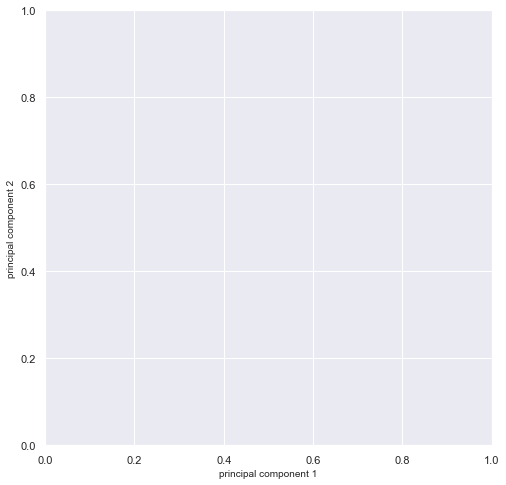

In [56]:
figs=plt.figure(figsize=(8,8))
ax=figs.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize=10)
ax.set_ylabel('principal component 2', fontsize=10)



In [28]:
from sklearn.ensemble import RandomForestClassifier

features=np.array(['age', 'job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign'])
clf=RandomForestClassifier()
clf.fit(data[features],data['y'])

RandomForestClassifier()

In [45]:
importances=clf.feature_importances_  #len is 13
sorted_idx=np.argsort(importances)


13


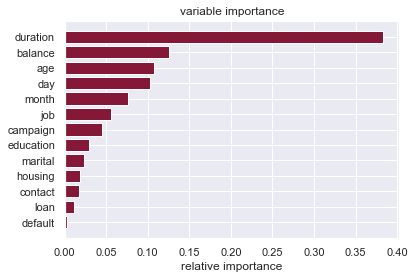

In [31]:
padding=np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx],align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("relative importance")
plt.title("variable importance")
plt.show()

Feature: 0, Score: 0.49351
Feature: 1, Score: -0.41169
Feature: 2, Score: 0.27253
Feature: 3, Score: 0.18284
Feature: 4, Score: -0.52518
Feature: 5, Score: 0.04419
Feature: 6, Score: 0.06553
Feature: 7, Score: -0.64818
Feature: 8, Score: -0.01596
Feature: 9, Score: -0.11633
Feature: 10, Score: 0.09287
Feature: 11, Score: -0.46256
Feature: 12, Score: 0.16161


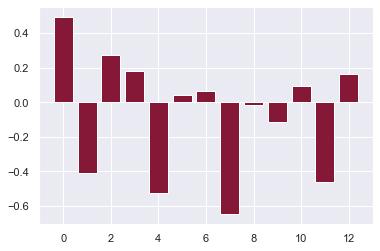

In [44]:
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
X,y= make_classification(n_samples=1000,n_features=13,n_informative=5, n_redundant=5,random_state=1)

model=LogisticRegression()
model.fit(X,y)
importance=model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [43]:
count=0
for i in features:
    print('Feature' ,count, ': is',i)
    count+=1

Feature 0 : is age
Feature 1 : is job
Feature 2 : is marital
Feature 3 : is education
Feature 4 : is default
Feature 5 : is balance
Feature 6 : is housing
Feature 7 : is loan
Feature 8 : is contact
Feature 9 : is day
Feature 10 : is month
Feature 11 : is duration
Feature 12 : is campaign
